In [3]:
from google.colab import files
files.upload()


Saving customers.csv to customers.csv


{'customers.csv': b'CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)\r\n0001,Male,19,15,39\r\n0002,Male,21,15,81\r\n0003,Female,20,16,6\r\n0004,Female,23,16,77\r\n0005,Female,31,17,40\r\n0006,Female,22,17,76\r\n0007,Female,35,18,6\r\n0008,Female,23,18,94\r\n0009,Male,64,19,3\r\n0010,Female,30,19,72\r\n0011,Male,67,19,14\r\n0012,Female,35,19,99\r\n0013,Female,58,20,15\r\n0014,Female,24,20,77\r\n0015,Male,37,20,13\r\n0016,Male,22,20,79\r\n0017,Female,35,21,35\r\n0018,Male,20,21,66\r\n0019,Male,52,23,29\r\n0020,Female,35,23,98\r\n0021,Male,35,24,35\r\n0022,Male,25,24,73\r\n0023,Female,46,25,5\r\n0024,Male,31,25,73\r\n0025,Female,54,28,14\r\n0026,Male,29,28,82\r\n0027,Female,45,28,32\r\n0028,Male,35,28,61\r\n0029,Female,40,29,31\r\n0030,Female,23,29,87\r\n0031,Male,60,30,4\r\n0032,Female,21,30,73\r\n0033,Male,53,33,4\r\n0034,Male,18,33,92\r\n0035,Female,49,33,14\r\n0036,Female,21,33,81\r\n0037,Female,42,34,17\r\n0038,Female,30,34,73\r\n0039,Female,36,37,26\r\n0040,Female,20,3

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
data = pd.read_csv('customers.csv')
data.head(4)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


In [6]:
X = data.iloc[:, 3:]
X.head(5)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


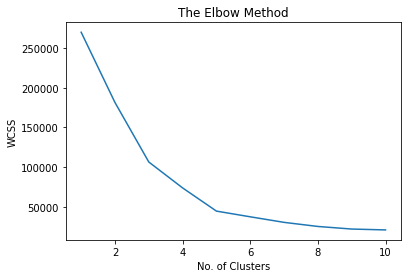

In [7]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()




In [8]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 2 4 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 2 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3 2 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [11]:
test = kmeans.predict(np.asarray([[4,4]]))
test[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


4

In [12]:
import os
import sys
import pickle

projectabspathname = os.path.abspath('projectname.pickle')
print(projectabspathname)
projectname = 'projectname.ipynb'
projectpickle = open(str(projectabspathname),'wb')
pickle.dump(projectname, projectpickle)
projectpickle.close()

In [13]:
X[y_kmeans==2]

,Annual Income (k$),Spending Score (1-100)
43,39,61
46,40,55
47,40,47
48,40,42
49,40,42
...,...,...
121,67,40
122,69,58
126,71,35
132,72,34


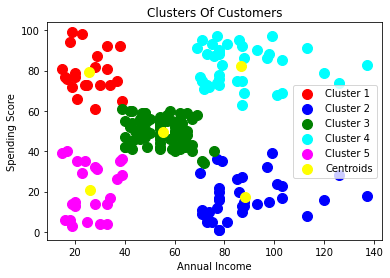

In [17]:

plt.scatter(X[y_kmeans== 0]['Annual Income (k$)'], X[y_kmeans == 0]['Spending Score (1-100)'], s= 100, c= 'red', label ='Cluster 1')
plt.scatter(X[y_kmeans== 1]['Annual Income (k$)'], X[y_kmeans == 1]['Spending Score (1-100)'], s= 100, c= 'blue', label ='Cluster 2')
plt.scatter(X[y_kmeans== 2]['Annual Income (k$)'], X[y_kmeans == 2]['Spending Score (1-100)'], s= 100, c= 'green', label ='Cluster 3')
plt.scatter(X[y_kmeans== 3]['Annual Income (k$)'], X[y_kmeans == 3]['Spending Score (1-100)'], s= 100, c= 'cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans== 4]['Annual Income (k$)'], X[y_kmeans == 4]['Spending Score (1-100)'], s= 100, c= 'magenta', label ='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c= 'yellow', label = 'Centroids')
plt.title('Clusters Of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

Hierarchial Clustering:

In [238]:
import random as pyrandom
from pylab import *

from scipy.spatial.distance import cdist
#figsize(6,6)

In [239]:
data = r_[10*randn(1000,2)+ array([70,30]),10*randn(1000,2) + array([10,10]),10*randn(1000,2) + array([50,50])]
print(len(data))
data = data [pyrandom.sample(range(len(data)),len(data))]

3000


In [240]:
ccolors = ['go','ro','bo','mo','co','yo']
def plotclusters(data, centers = None):
  xlim=([0,100]); ylim=([0,100])
  
  if centers is None:
    plot(data[:,0], data[:,1], 'bo', markersize=5)
  else:
    for i in range(amax(centers)+1):
      plot(data[centers==i,0],data[centers==i,1],ccolors[i%len(ccolors)],markersize=5)




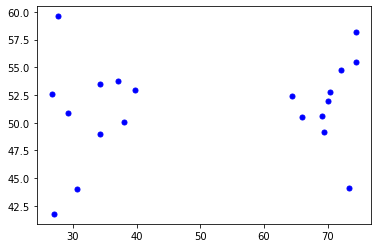

In [241]:
data = r_[4*randn(10,2)+ array([70,50]),4*randn(10,2)+ array([30,50])]
plotclusters(data)

In [242]:
from scipy.spatial.distance import cdist
ds = cdist(data,data)

In [243]:
from scipy.cluster.hierarchy import *
lm = linkage(ds, 'single')
lm[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


array([[ 3.        ,  8.        ,  2.71673916,  2.        ],
       [ 2.        ,  4.        ,  3.96351209,  2.        ],
       [20.        , 21.        ,  5.30912697,  4.        ],
       [ 0.        ,  9.        ,  6.96210427,  2.        ],
       [ 6.        ,  7.        ,  7.08402586,  2.        ]])

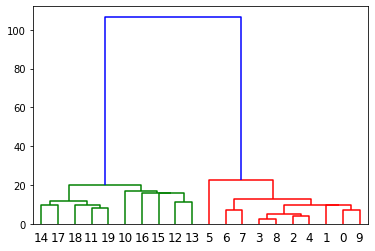

In [244]:
_=dendrogram(lm)

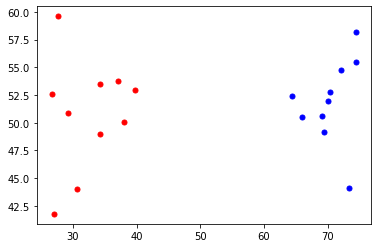

In [245]:
plotclusters(data, fcluster(lm, 2, criterion='maxclust'))

In [246]:
data = r_[dot(randn(100,2), diag([4,10]))+ array([60,60]),dot(randn(100,2), diag([4,10]))+ array([40,40])]
shuffle(data)

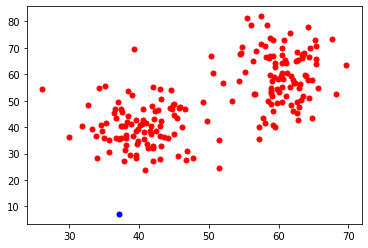

In [247]:
assignment = fclusterdata(data, 2, metric ='euclidean', method ='single', criterion ='maxclust')
plotclusters(data, assignment)

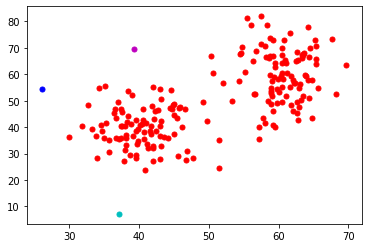

In [248]:
assignment = fclusterdata(data, 4, metric ='euclidean', method ='single', criterion ='maxclust')
plotclusters(data, assignment)

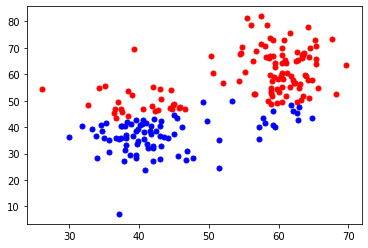

In [249]:
assignment = fclusterdata(data, 2 , metric ='euclidean', method ='complete', criterion ='maxclust')
plotclusters(data, assignment)

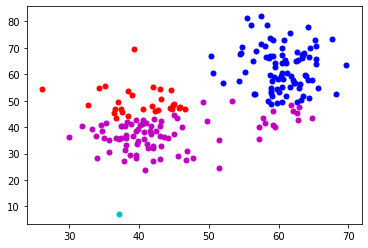

In [250]:
assignment = fclusterdata(data, 4, metric ='euclidean', method ='complete', criterion ='maxclust')
plotclusters(data, assignment)

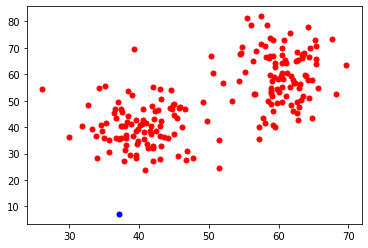

In [251]:
assignment = fclusterdata(data, 2, metric ='euclidean', method ='average', criterion ='maxclust')
plotclusters(data, assignment)

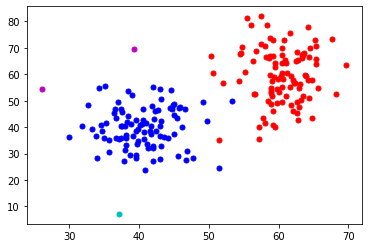

In [252]:
assignment = fclusterdata(data, 4, metric ='euclidean', method ='average', criterion ='maxclust')
plotclusters(data, assignment)

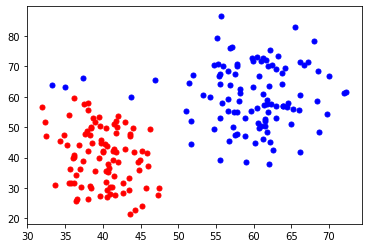

In [ ]:
lm = linkage(data, metric='euclidean', method ='centroid')
assignment = fcluster(lm, 2 , criterion ='maxclust')
plotclusters(data,assignment)

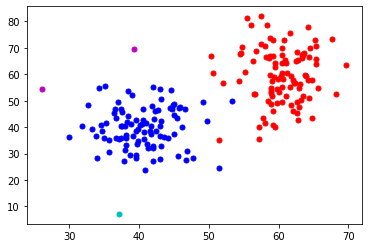

In [253]:
lm = linkage(data, metric='euclidean', method ='centroid')
assignment = fcluster(lm, 4, criterion ='maxclust')
plotclusters(data,assignment)

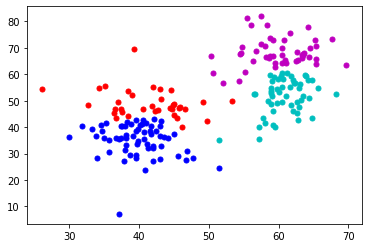

In [254]:
lm = linkage(data, metric='euclidean', method ='ward')
assignment = fcluster(lm,  4, criterion ='maxclust')
plotclusters(data,assignment)

DBSCAN

In [255]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

In [257]:
centers =[[1,1],[-1,-1],[1,-1]]
X, labels_true = make_blobs(n_samples = 750, centers = centers, cluster_std =0.4, random_state =0)
X = StandardScaler().fit_transform(X)


In [258]:
db = DBSCAN(eps=0.3, min_samples =10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_]= True
labels = db.labels_

In [267]:
n_clusters = len(set(labels))-(1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(len(set(labels)))
print(n_clusters)


4
3


In [260]:
print('No of clusters:%d'% n_clusters)
print('No. of noise:%d'% n_noise)
print('Homogeneity:%0.03f'% metrics.homogeneity_score(labels_true,labels))

No of clusters:3
No. of noise:18
Homogeneity:0.953


{0, 1, 2, -1}
4


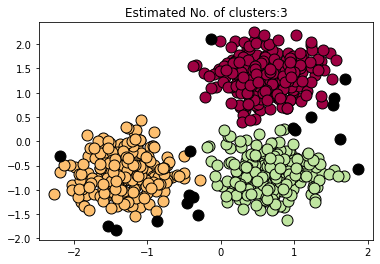

[ True  True  True  True  True False  True  True  True  True  True  True
  True  True False  True False  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True False  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True False  True
  True False  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True False  True  True
 False  True False  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True False  True  True False  True  True  True  True False  True
 False  True False  True  True False  True  True  T

In [270]:
import matplotlib.pyplot as plt
unique_labels = set(labels)
print(unique_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
print(len(colors))

for k, col in zip(unique_labels, colors):
  
  if k ==-1:
    col = [0, 0, 0, 1]
  class_member_mask = (labels==k)
  xy = X[class_member_mask & core_samples_mask]
  plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize = 11)

  xy = X[class_member_mask & ~core_samples_mask]
  plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = tuple(col), markeredgecolor ='k', markersize=11)

plt.title('Estimated No. of clusters:%d'% n_clusters)
plt.show()
print(core_samples_mask)

In [262]:
print('Rand_index: %0.3f'% metrics.adjusted_rand_score(labels_true, labels))

Rand_index: 0.952


In [200]:
!pip install pandas_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 3.6 MB/s 


In [263]:
from sklearn.metrics import jaccard_score
metrics.jaccard_score(labels_true, labels,average= 'micro')

0.9455252918287937

In [264]:
import numpy as np
from sklearn import metrics
def purity_score(y_true, y_pred):
  contigency_matrix = metrics.cluster.contigency_matrix(y_true,y_pred)
  return np.sum(np.amax(contigency_matrix, axis =0))/np.sum(contigency_matrix)

In [265]:
purity_score(labels_true, labels)

AttributeError: ignored

In [227]:
metrics.silhouette_score

<function sklearn.metrics.cluster._unsupervised.silhouette_score>